# Bank Marketing Campaign

**Dataset:** We receive this dataset from UC Irvine Machine Learning Repository. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed. 

With this data set, we try to do three main things, in the same order
1. Exploratory Data Analysis and visualization
2. Predictive analysis with Hyperparameter Optimization and Cross Validation
3. Understanding Feature Importance

# Attribute Information:
(From UC Irvine Machine Learning Repository)

**Input variables:**
**bank client data:**

1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**
8. - contact: contact communication type (categorical: 'cellular','telephone') 
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
**other attributes:**
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**social and economic context attributes**
16. - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. - cons.price.idx: consumer price index - monthly indicator (numeric) 
18. - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. - euribor3m: euribor 3 month rate - daily indicator (numeric)
20. - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21. - y - has the client subscribed a term deposit? (binary: 'yes','no')

We begin by loading the required packages. 

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We load the file into dataframe df. In the very beginning we drop the column 'duration'. 'duration' is the length of the call with the customer. It is recorded after the call has ended. The length of the call often has a correlation to the output variable. Besides, its value is not known before the call was made. Hence, we do not wish to include it in the model.

In [2]:
df=pd.read_csv("Bank.csv")
df=df.drop(['duration'],axis=1)
print(df.shape)
df.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


Checking whether the object types match description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null int64
y                 41188 non-null object
dtypes: float64(4), int64(5), object(11)
memory usage: 6.3+ MB


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Checking whether there are any empty rows in any column

In [5]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Converting the yes, no format to 1, 0 value. 

In [6]:
df.loc[(df['y'] == 'no'), 'y'] = 0
df.loc[(df['y'] == 'yes'), 'y'] = 1

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


Checking how many unique ages are present.

In [8]:
print("Ages: \n", df['age'].unique())

Ages: 
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Checking how many unique jobs people do.

In [9]:
print("Employment: \n", df['job'].unique())

Employment: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Checking marital status.

In [10]:
print("Marital Status: \n", df['marital'].unique())

Marital Status: 
 ['married' 'single' 'divorced' 'unknown']


Education status.

In [11]:
print("Education: \n", df['education'].unique())

Education: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Do they have credit in default.

In [12]:
print("Default: \n", df['default'].unique())

Default: 
 ['no' 'unknown' 'yes']


Whether there is a Housing Loan

In [13]:
print("Is there a housing Loan: \n", df['housing'].unique())

Is there a housing Loan: 
 ['no' 'yes' 'unknown']


Whether there is a Personal Loan.

In [14]:
print("Is there a Loan: \n" ,df['loan'].unique())

Is there a Loan: 
 ['no' 'yes' 'unknown']


Cellular or telephone contact.

In [15]:
print("Kind of Contact: \n", df['contact'].unique())

Kind of Contact: 
 ['telephone' 'cellular']


Last contact month of year.

In [16]:
print("\nLast contact month: \n", df['month'].unique())


Last contact month: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Last contact day of week

In [17]:
print("\nLast contact day of week: \n", df['day_of_week'].unique())


Last contact day of week: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


Number of contacts performed for this client during this phase.

In [18]:
print("\nNo. of times contacted the client: \n", df['campaign'].unique())


No. of times contacted the client: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


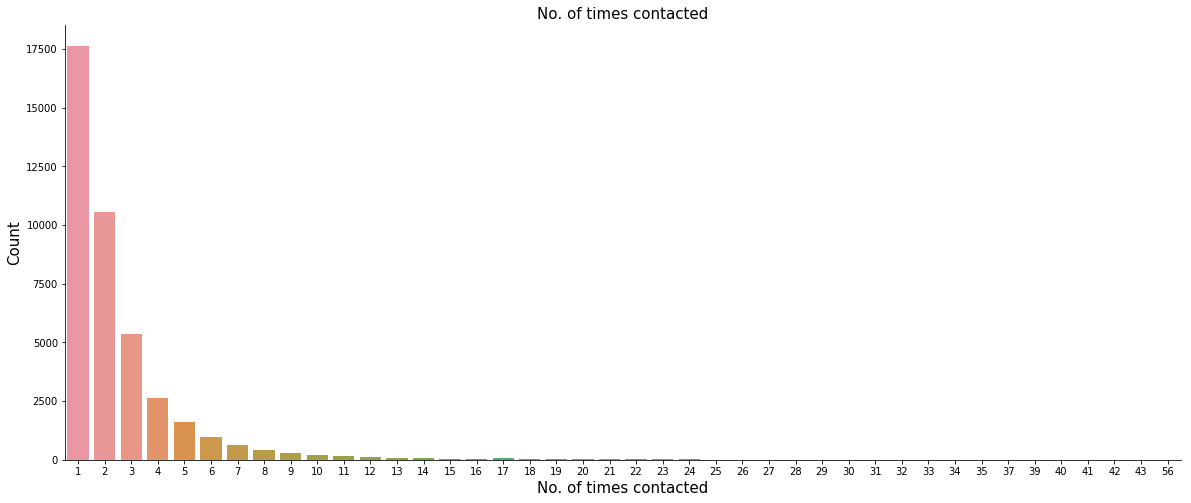

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'campaign', data = df)
ax.set_xlabel('No. of times contacted', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('No. of times contacted', fontsize=15)
sns.despine()

We can see that for the vast majority the count is 1, 2 or 3.

In [20]:
print("\nNo. of days since last contacted from previous campaign: \n", df['pdays'].unique())


No. of days since last contacted from previous campaign: 
 [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


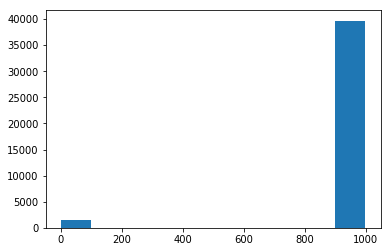

In [21]:
plt.hist(df['pdays'])
plt.show()

From the data description, we know that when pdays = 999, the customer was never contacted before. We will go ahead and make that a category.

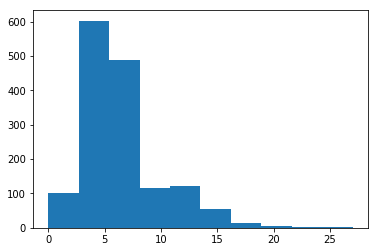

In [22]:
plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

In [23]:
#Add new categorical variables to our dataframe.
df['missing'] = 0
df['less_5'] = 0
df['greater_15'] = 0
df['bet_5_15'] = 0
df['missing'][df['pdays']==999] = 1
df['less_5'][df['pdays']<5] = 1
df['greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
df = df.drop('pdays', axis=1);

In [24]:
print("\nNo. of days since last contact before this campaign: \n", df['previous'].unique())


No. of days since last contact before this campaign: 
 [0 1 2 3 4 5 6 7]


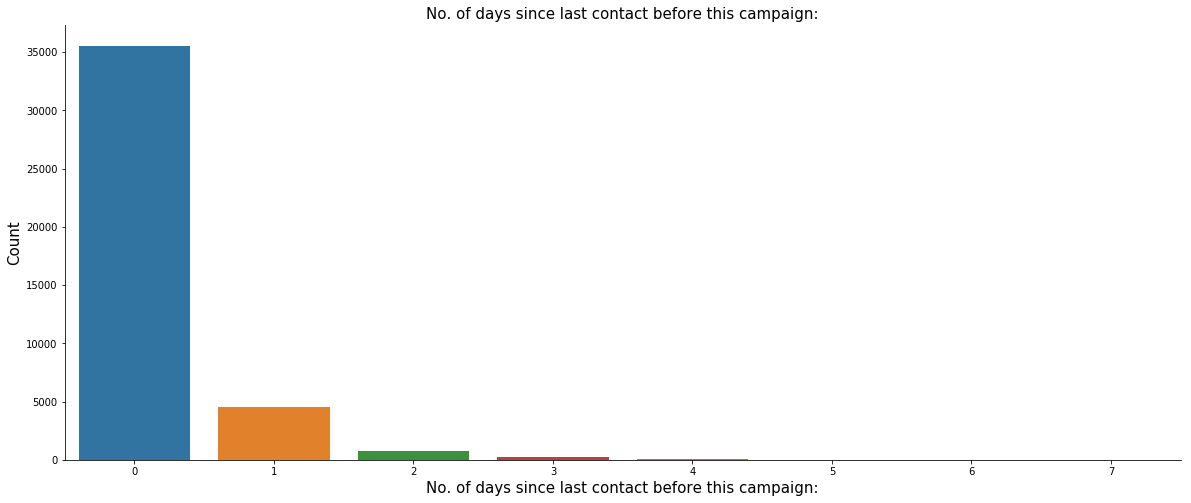

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'previous', data = df)
ax.set_xlabel('No. of days since last contact before this campaign:', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('No. of days since last contact before this campaign:', fontsize=15)
sns.despine()

We can see that vast majority were never contacted before.

Checking the continuous variables

In [26]:
print('Min age: ', df['age'].min())
print('Max age: ', df['age'].max())
print('Mean: ', df['age'].mean())
print('Mode: ', df['age'].mode())
print('Null Values: ', df['age'].isnull().any())

Min age:  17
Max age:  98
Mean:  40.02406040594348
Mode:  0    31
dtype: int64
Null Values:  False


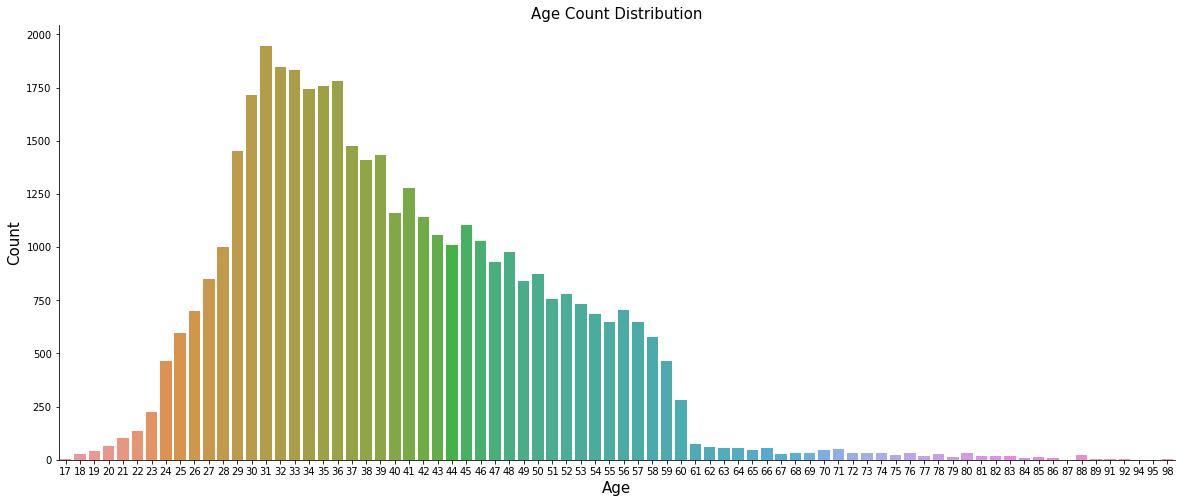

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [28]:
print('Min: ', df['emp.var.rate'].max())
print('Max: ', df['emp.var.rate'].min())
print('Mean: ', df['emp.var.rate'].mean())
print('Mode: ', df['emp.var.rate'].mode())

Min:  1.4
Max:  -3.4
Mean:  0.0818855006319146
Mode:  0    1.4
dtype: float64


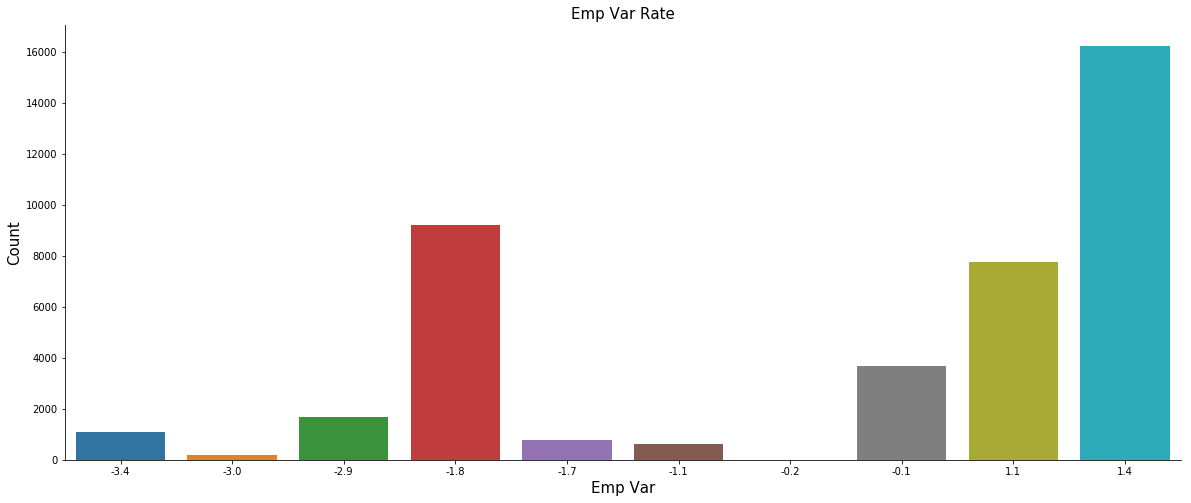

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'emp.var.rate', data = df)
ax.set_xlabel('Emp Var', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Emp Var Rate', fontsize=15)
sns.despine()

In [30]:
print('Min: ', df['cons.price.idx'].max())
print('Max: ', df['cons.price.idx'].min())
print('Mean: ', df['cons.price.idx'].mean())
print('Mode: ', df['cons.price.idx'].mode())

Min:  94.76700000000001
Max:  92.20100000000001
Mean:  93.57566436831263
Mode:  0    93.994
dtype: float64


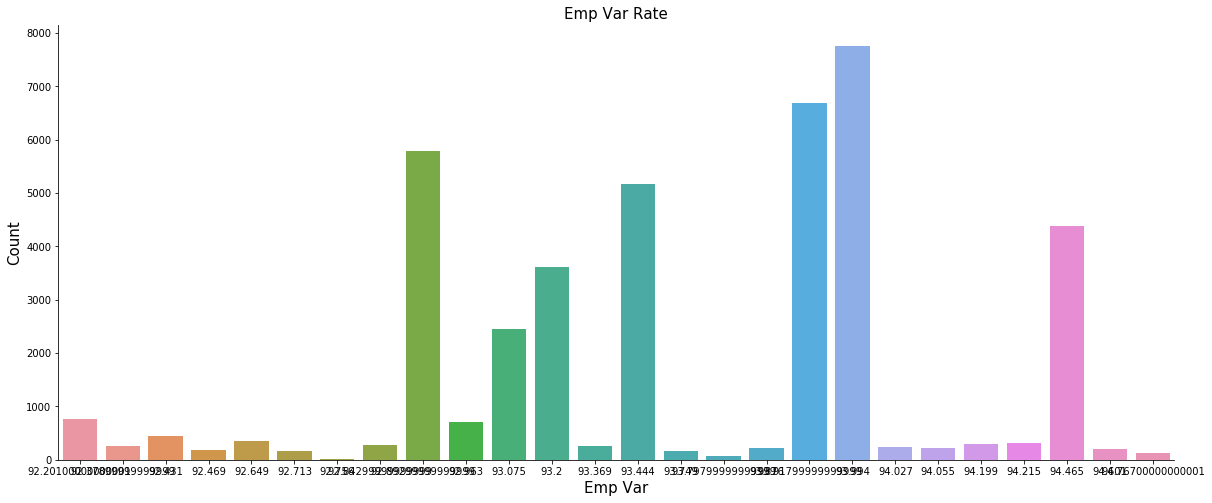

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'cons.price.idx', data = df)
ax.set_xlabel('Emp Var', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Emp Var Rate', fontsize=15)
sns.despine()

In [32]:
print('Min: ', df['cons.conf.idx'].max())
print('Max: ', df['cons.conf.idx'].min())
print('Mean: ', df['cons.conf.idx'].mean())
print('Mode: ', df['cons.conf.idx'].mode())

Min:  -26.9
Max:  -50.8
Mean:  -40.50260027191399
Mode:  0   -36.4
dtype: float64


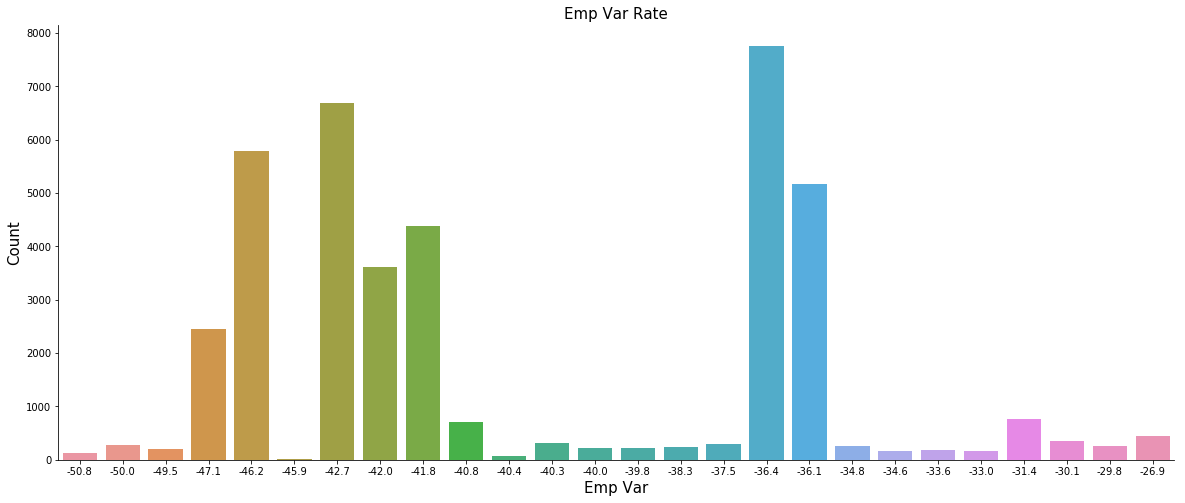

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'cons.conf.idx', data = df)
ax.set_xlabel('Emp Var', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Emp Var Rate', fontsize=15)
sns.despine()

In [34]:
print('Min: ', df['euribor3m'].max())
print('Max: ', df['euribor3m'].min())
print('Mean: ', df['euribor3m'].mean())
print('Mode: ', df['euribor3m'].mode())

Min:  5.045
Max:  0.634
Mean:  3.621290812858068
Mode:  0    4.857
dtype: float64


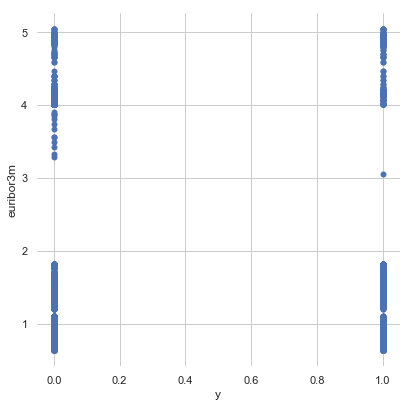

In [35]:
sns.set(style="whitegrid")

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="y", y="euribor3m",
               palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

In [36]:
numerical_variables = ['age', 'emp.var.rate', 'cons.price.idx','euribor3m']
for col in numerical_variables:
    print("Mean Age of 'no' for ",col, ":",df[col].loc[df['y']==1].mean())
    print("Mean Std Dev of 'no' for ",col,":",df[col].loc[df['y']==1].std())
    print("Mean Age of 'yes' for ",col,":",df[col].loc[df['y']==0].mean())
    print("Mean Std Dev of 'yes' for ", col, ":",df[col].loc[df['y']==0].std())
    print("")

Mean Age of 'no' for  age : 40.91314655172414
Mean Std Dev of 'no' for  age : 13.837476239030515
Mean Age of 'yes' for  age : 39.911185290576775
Mean Std Dev of 'yes' for  age : 9.898131795279447

Mean Age of 'no' for  emp.var.rate : -1.2334482758620953
Mean Std Dev of 'no' for  emp.var.rate : 1.6236257443726576
Mean Age of 'yes' for  emp.var.rate : 0.24887545146174428
Mean Std Dev of 'yes' for  emp.var.rate : 1.4829316274716506

Mean Age of 'no' for  cons.price.idx : 93.35438599138173
Mean Std Dev of 'no' for  cons.price.idx : 0.6766438009043755
Mean Age of 'yes' for  cons.price.idx : 93.60375705925486
Mean Std Dev of 'yes' for  cons.price.idx : 0.5589929413584739

Mean Age of 'no' for  euribor3m : 2.123135129310348
Mean Std Dev of 'no' for  euribor3m : 1.7425979218386405
Mean Age of 'yes' for  euribor3m : 3.811491162306908
Mean Std Dev of 'yes' for  euribor3m : 1.638187470941933



We calculated the various statistical measures for the numerical variables for 'yes' and for 'no'. To check if there are any statistically significant difference, we wish to plot the confidence interval of these variables vis-a-vis 'yes' and 'no'.

What are the distribution of numerical factors wrt y and the match of the confidence intervals


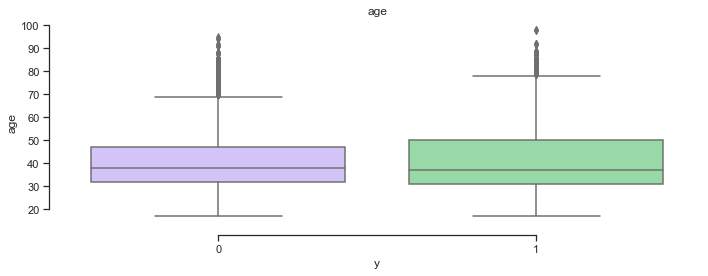

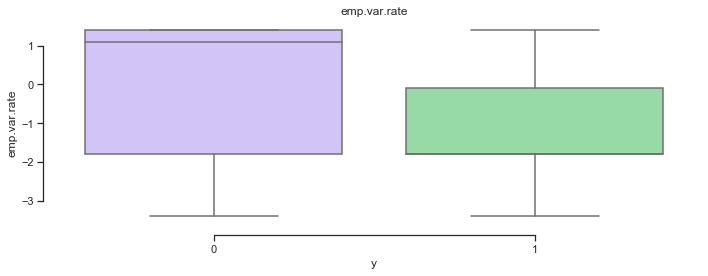

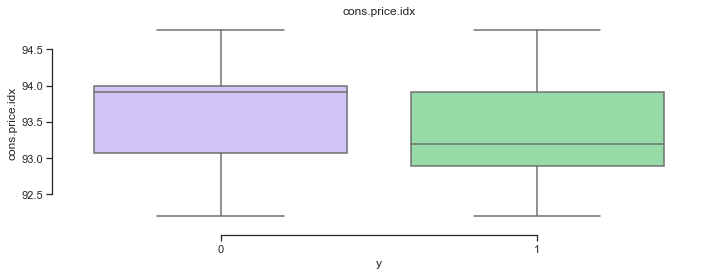

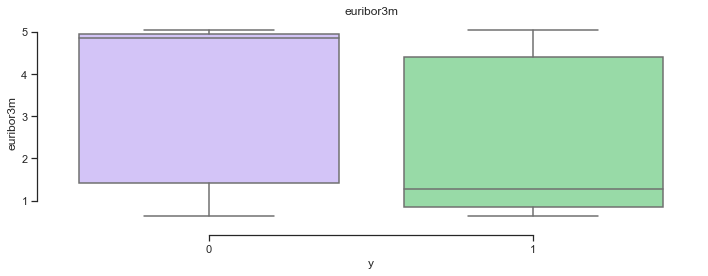

In [37]:
numerical_variables = ['age', 'emp.var.rate', 'cons.price.idx','euribor3m']
print("What are the distribution of numerical factors wrt y and the match of the confidence intervals")
for col in numerical_variables:
    plt.figure(figsize=(10,4))
    sns.set(style="ticks", palette="pastel")
    # Draw a nested boxplot to show bills by day and time
    sns.boxplot(x="y", y=df[col],
             palette=["m", "g"],
            data=df)
    sns.despine(offset=10, trim=True)
    plt.title(col)
    plt.tight_layout()

We fail to find any statistically significant difference in confidence intervals from the plots.  

Finding the count of categorical variables 

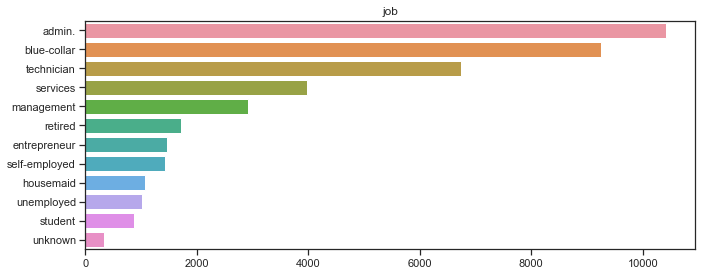

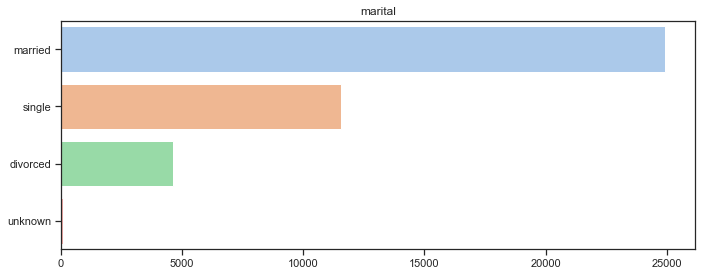

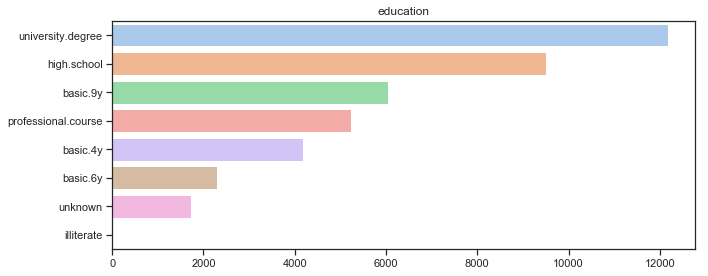

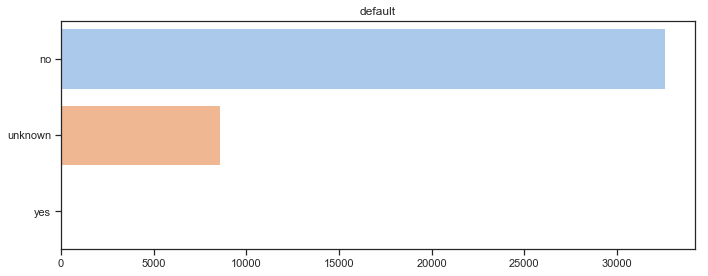

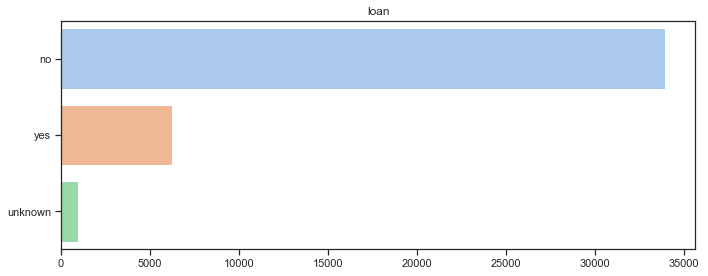

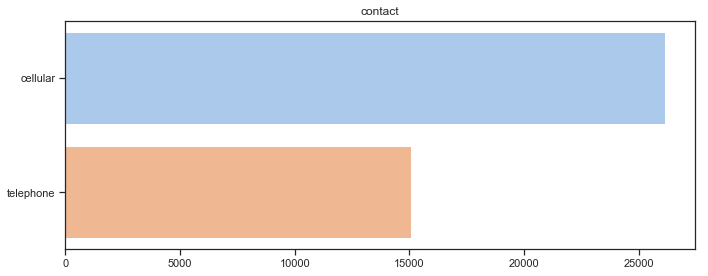

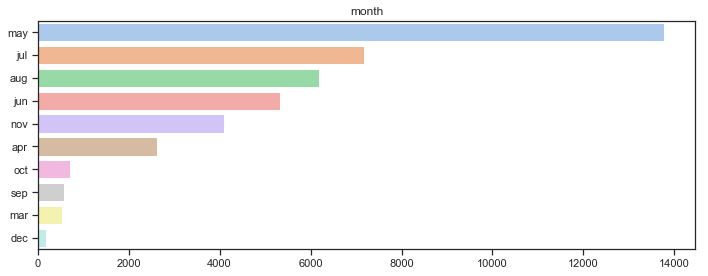

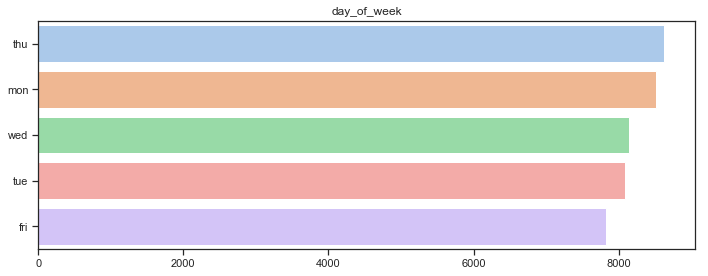

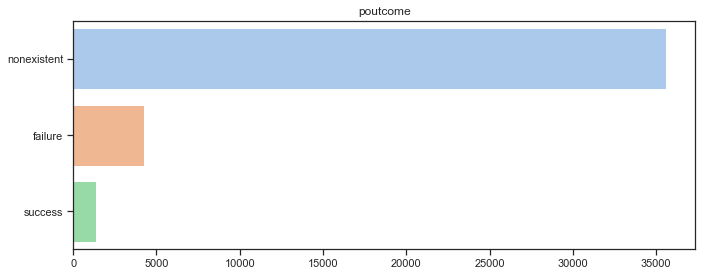

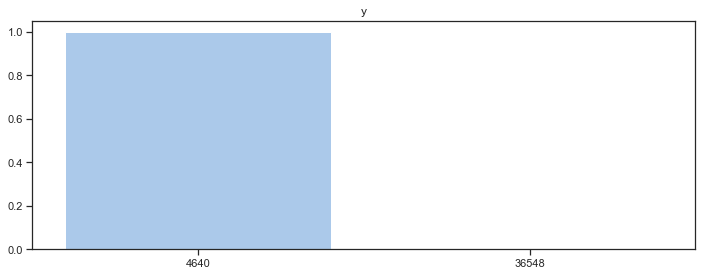

In [38]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Converting to dummy variable.

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan']) # Label encoder order is alphabetical
df['contact']  = labelencoder_X.fit_transform(df['contact']) 
df['month']    = labelencoder_X.fit_transform(df['month']) 
df['day_of_week'] = labelencoder_X.fit_transform(df['day_of_week']) 
df['poutcome'] = labelencoder_X.fit_transform(df['poutcome']) 

Converting age to 4 categories.

In [40]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df);

In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,missing,less_5,greater_15,bet_5_15
0,3,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,0,1,0,0,0
1,3,7,1,3,1,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,0,1,0,0,0
2,2,7,1,3,0,2,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,0,1,0,0,0
3,2,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,0,1,0,0,0
4,3,7,1,3,0,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191,0,1,0,0,0


In [42]:
df['Ynew'] = 0
df['Ynew'] = df['y']
df = df.drop('y', axis=1)

In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,missing,less_5,greater_15,bet_5_15,Ynew
0,3,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,1,0,0,0,0
1,3,7,1,3,1,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,1,0,0,0,0
2,2,7,1,3,0,2,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,1,0,0,0,0
3,2,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191,1,0,0,0,0
4,3,7,1,3,0,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191,1,0,0,0,0


Calculation and plotting correlation.

In [44]:
import math
corr = df.corr()
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,missing,less_5,greater_15,bet_5_15,Ynew
age,1.000000,-0.002732,-0.379027,-0.107467,0.162447,0.000140,-0.002259,0.019655,-0.018201,-0.019549,...,0.021099,0.013344,0.109035,0.031448,0.009054,-0.018304,0.017646,-0.012159,0.011470,0.009837
job,-0.002732,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.008271,-0.016017,0.052760,-0.007880,-0.019517,-0.028466,0.020967,0.007223,0.017975,0.025122
marital,-0.379027,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.084210,-0.057477,-0.033783,-0.091939,-0.086282,-0.037973,0.022609,0.017645,0.027057,0.046203
education,-0.107467,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,-0.043778,-0.081607,0.078799,-0.036380,-0.041404,-0.046610,0.035830,0.015574,0.027270,0.057799
default,0.162447,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.203263,0.168073,0.026522,0.195336,0.189782,0.080066,-0.053597,-0.015607,-0.056421,-0.099352
housing,0.000140,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.060196,-0.080504,-0.033845,-0.059277,-0.045877,-0.010518,0.009767,-0.005458,0.006594,0.011552
loan,-0.002259,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.001849,-0.002430,-0.012025,0.000125,0.003887,0.000365,0.003269,-0.009330,-0.001403,-0.004909
contact,0.019655,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.393584,0.591474,0.251614,0.399773,0.269371,0.117965,-0.080252,-0.018069,-0.083043,-0.144773
month,-0.018201,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.178782,-0.004239,0.009652,-0.117264,-0.220561,-0.047883,0.033850,0.019381,0.029939,-0.006065
day_of_week,-0.019549,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,0.033245,0.005644,0.041465,0.039043,0.028440,-0.009507,0.006363,-0.000100,0.007126,0.015967


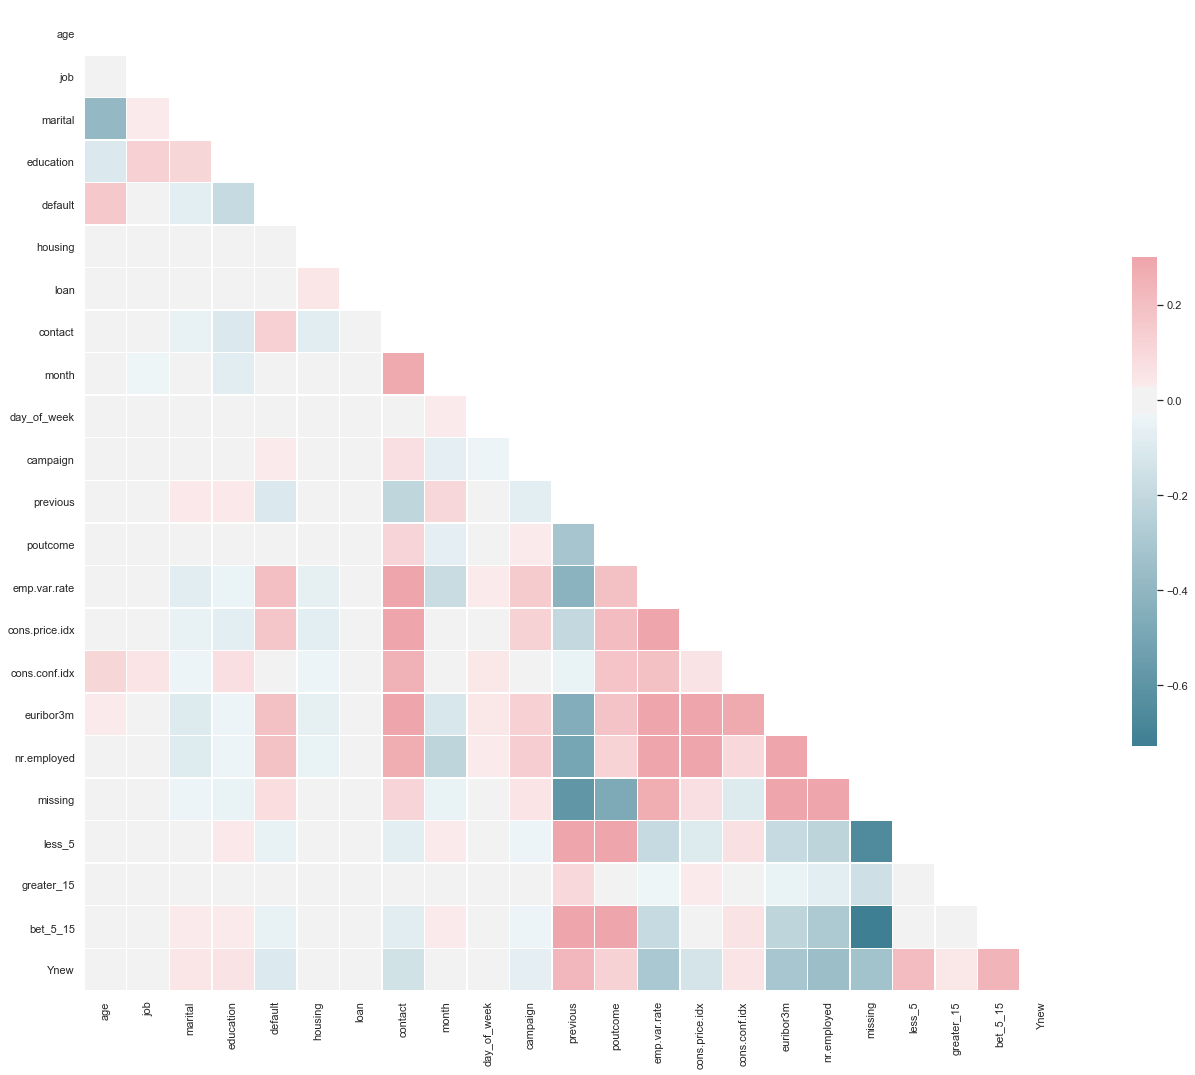

In [45]:
#plotting of heatmap of correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can see that 'Ynew' has correlation with 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed', 'missing', 'less_5', and 'bet_5_15'. 

In [46]:
Y = np.asarray(df['Ynew'])
X = np.asarray(df.drop('Ynew', axis=1))

In [47]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

Logistic Regression model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=5, n_jobs=1, scoring = 'accuracy').mean())
LOGCV

0.901608546575785

Confusion Matrix

Text(0.5, 257.44, 'Predicted')

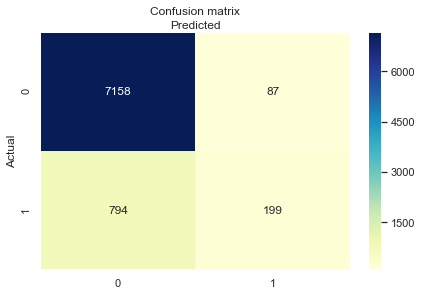

In [49]:
y_pred = logmodel.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

ROC for Logistic Regression

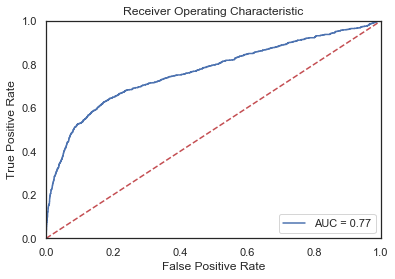

In [50]:
probs = logmodel.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XG Boost model

In [51]:
from xgboost import XGBClassifier
model = XGBClassifier( booster = 'dart',
 learning_rate =0.05,
 n_estimators=50,
 max_depth=20,
 min_child_weight=5,
 gamma=0.01,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb = model.fit(X_train, y_train)
scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5).mean()
scores_xgb

0.9024277857459719

XG Boost Confusion Matrix

Text(0.5, 257.44, 'Predicted')

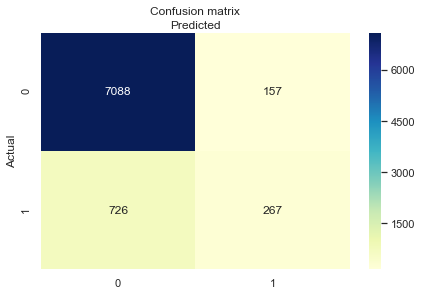

In [52]:
y_pred = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

XG Boost ROC Curve

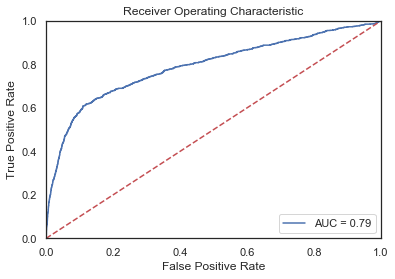

In [53]:
probs = xgb.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Light Gradient Boosting Method model and hyperparameter optimization

In [54]:
import lightgbm
from sklearn.metrics import confusion_matrix, accuracy_score
from lightgbm import LGBMClassifier
leaves = [25,50,100,150,200]

for n in leaves:
    model = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,num_leaves=n,
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=1,max_depth=30,
                       learning_rate=0.1, n_estimators=50, max_bin=10, subsample_for_bin=20, 
                       min_split_gain=0.1, min_child_weight=0.1, min_child_samples=5, subsample=0.8, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=1, seed=0, nthread=-1, silent=True)
    lgb = model.fit(X_train, y_train)
    scores_lgbm = cross_val_score(lgb, X_train, y_train, cv=5)
    lgbpred = lgb.predict(X_test)
    print(confusion_matrix(y_test, lgbpred ))
    print(scores_lgbm.mean())

[[7129  116]
 [ 764  229]]
0.9029437604378414
[[7123  122]
 [ 760  233]]
0.9016993633538887
[[7102  143]
 [ 758  235]]
0.9009103718832625
[[7112  133]
 [ 740  253]]
0.9002123491541972
[[7090  155]
 [ 735  258]]
0.8997873938756126


Choosing the best model

In [55]:
model = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,num_leaves=25,
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=1,max_depth=30,
                       learning_rate=0.1, n_estimators=50, max_bin=10, subsample_for_bin=20, 
                       min_split_gain=0.1, min_child_weight=0.1, min_child_samples=5, subsample=0.8, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=1, seed=0, nthread=-1, silent=True)
lgb = model.fit(X_train, y_train)
scores_lgbm = cross_val_score(lgb, X_train, y_train, cv=5).mean()
scores_lgbm

0.9029437604378414

Confusion Matrix for best LightGBM

Text(0.5, 257.44, 'Predicted')

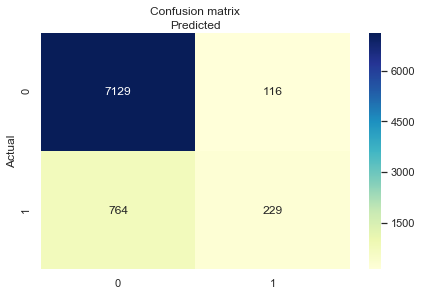

In [56]:
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Best Light GBM ROC Curve

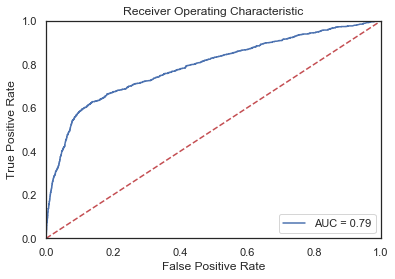

In [57]:
probs = lgb.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = cross_val_score(rfc, X_train, y_train, cv=5,scoring = 'accuracy').mean()
RFCCV

0.8947191361429037

Random Forest Confusion Matrix

Text(0.5, 257.44, 'Predicted')

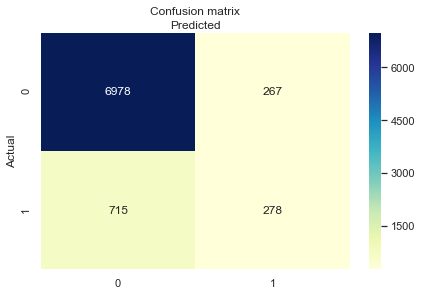

In [60]:
y_pred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Random Forest ROC Curve

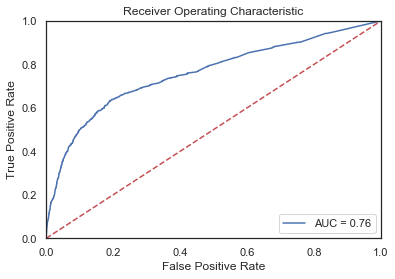

In [61]:
probs = rfc.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

kNN model and hyperparameter optimization and accuracy curve

k value: 1 Accuracy 0.8509256283618717
k value: 2 Accuracy 0.8897724955002918
k value: 3 Accuracy 0.8832475633653315
k value: 4 Accuracy 0.8919273261626316
k value: 5 Accuracy 0.889802826092696
k value: 6 Accuracy 0.8923520281552768
k value: 7 Accuracy 0.8919272202564998
k value: 8 Accuracy 0.8939605489385123
k value: 9 Accuracy 0.8936571509040137
k value: 10 Accuracy 0.8948709226527187
k value: 11 Accuracy 0.8935962272156515
k value: 12 Accuracy 0.8950227091709199
k value: 13 Accuracy 0.8938997035355832
k value: 14 Accuracy 0.8949013038930861
k value: 15 Accuracy 0.8950833887671973
k value: 16 Accuracy 0.8950227782401361
k value: 17 Accuracy 0.8944156782218622
k value: 18 Accuracy 0.894870867383369
k value: 19 Accuracy 0.8946281535623415
k value: 20 Accuracy 0.8942943282189688
k value: 21 Accuracy 0.8943246818428309
k value: 22 Accuracy 0.8944157104569583
k value: 23 Accuracy 0.8938086518858046
k value: 24 Accuracy 0.8949012532395322
k value: 25 Accuracy 0.8939604061619211


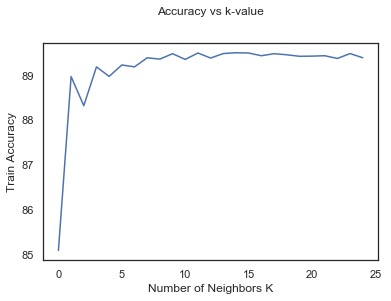

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
neighbors = np.arange(0,25)
cv_scores = []
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors=k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(scores*100)
    print("k value:", k_value,"Accuracy", scores)
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
plt.plot(neighbors, cv_scores)
plt.title('Accuracy vs k-value', y=1.1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

Choosing best kNN model

In [63]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', p=2, metric='euclidean')
knn.fit(X_train, y_train)
scoreskNN = model_selection.cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
scoreskNN

0.8948709226527187

Best kNN Confusion Matrix

Text(0.5, 257.44, 'Predicted')

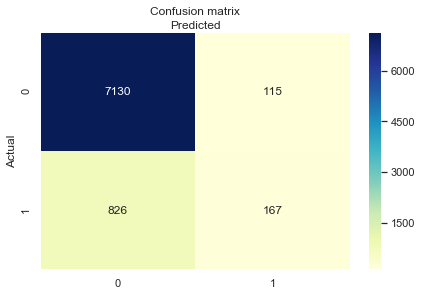

In [64]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Best kNN model ROC Curve

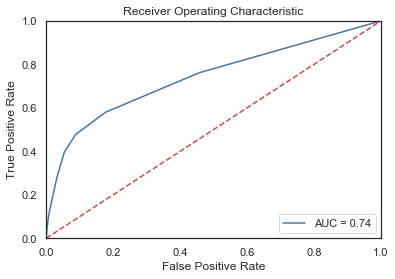

In [65]:
probs = knn.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

All ROC Curve

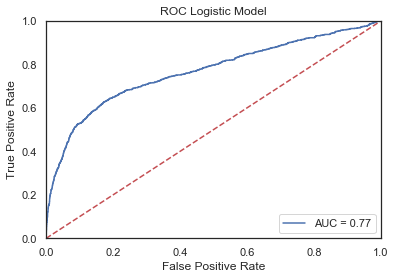

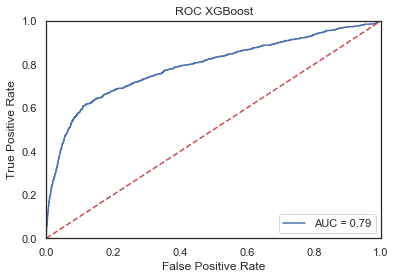

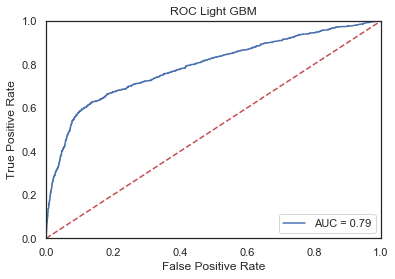

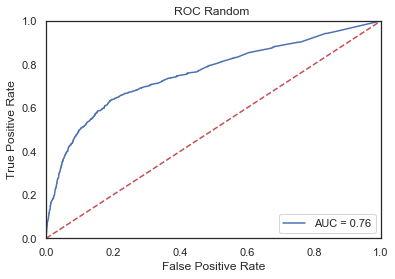

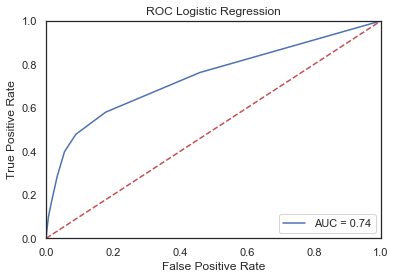

In [66]:
##########LogModel########
probs = logmodel.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Logistic Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
##########XGBoost#########
probs = xgb.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC XGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#########Light GBM###########
probs = lgb.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Light GBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#####Random Forest##########
probs = rfc.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Random ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
##########KNN#########
probs = knn.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


5-fold Cross Validation for all the models

In [67]:
print("Logistic Model CV Error", LOGCV)
print("XGBoost Model CV Error", scores_xgb)
print("LightGBM Model CV Error",scores_lgbm)
print("Random Forest Model CV Error", RFCCV)
print("kNN Model CV Error",scoreskNN)

Logistic Model CV Error 0.901608546575785
XGBoost Model CV Error 0.9024277857459719
LightGBM Model CV Error 0.9029437604378414
Random Forest Model CV Error 0.8947191361429037
kNN Model CV Error 0.8948709226527187


Based on the ROC curves, Confusion Matrices and CV Error Rates, we feel that most of the models are performing comaparably well with LightGBM performing better than the rest.

Defining a function for plotting all the feature importance.

In [68]:
def plotfeatures(train, featureimp):
    X = list(train.columns)
    X.remove('Ynew')
    feature_importance = pd.DataFrame(data = featureimp, index = X, columns=['coefficient_values'])
    feature_importance['sort'] = feature_importance.coefficient_values.abs()
    importance_df = pd.DataFrame(data = featureimp, index = X, columns=['coefficient_values'])
    feature_importance['sort'] = feature_importance.coefficient_values.abs()
    sorted= feature_importance.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 15)
    sns.barplot(np.array(sorted.coefficient_values), np.array(sorted.index.values))
    plt.title('Feature Importance')
    plt.xlabel('Value')
    plt.ylabel('Variables')


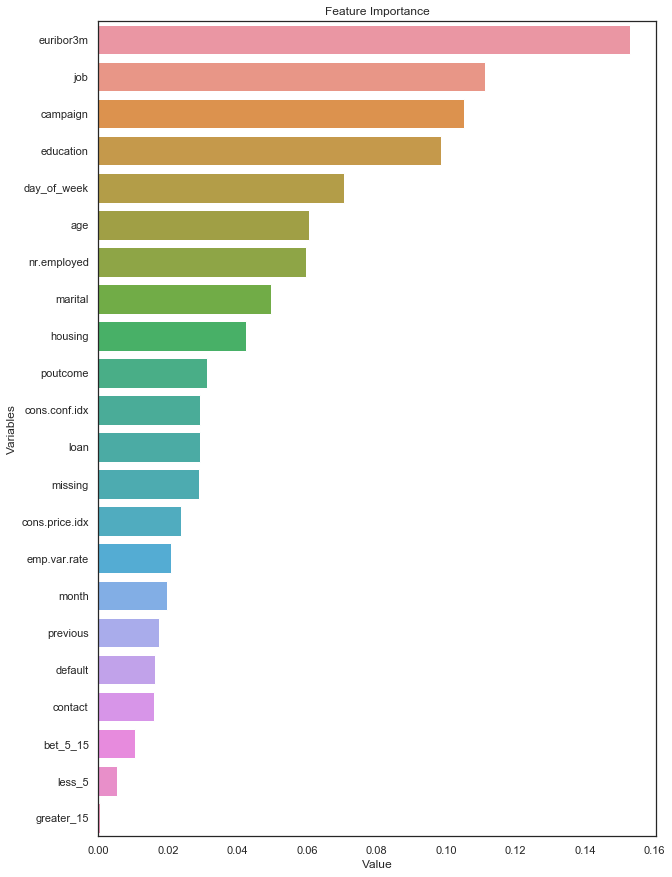

In [69]:
imp = rfc.feature_importances_
plotfeatures(df, imp)

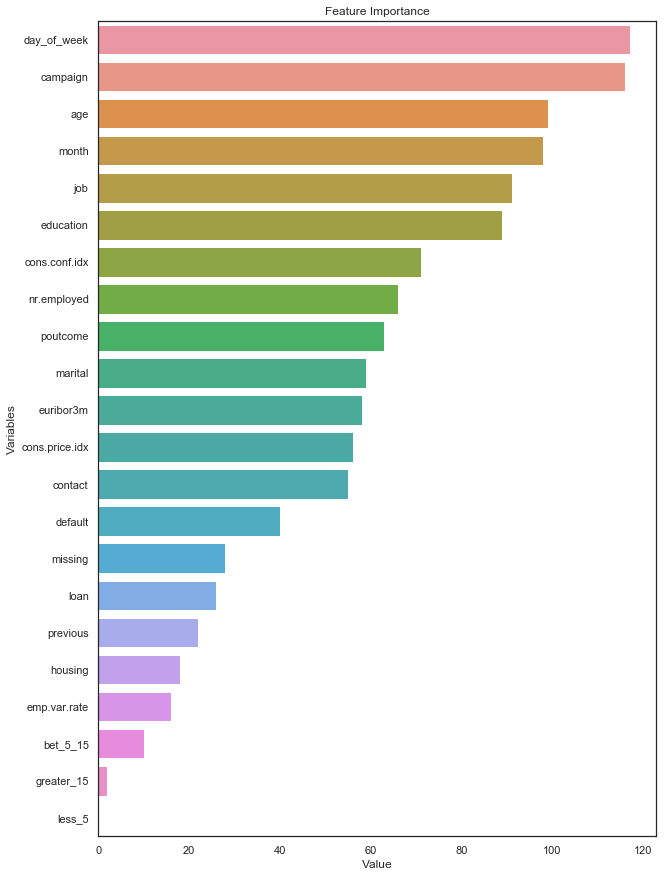

In [70]:
lgbf = lgb.feature_importances_
plotfeatures(df, lgbf)

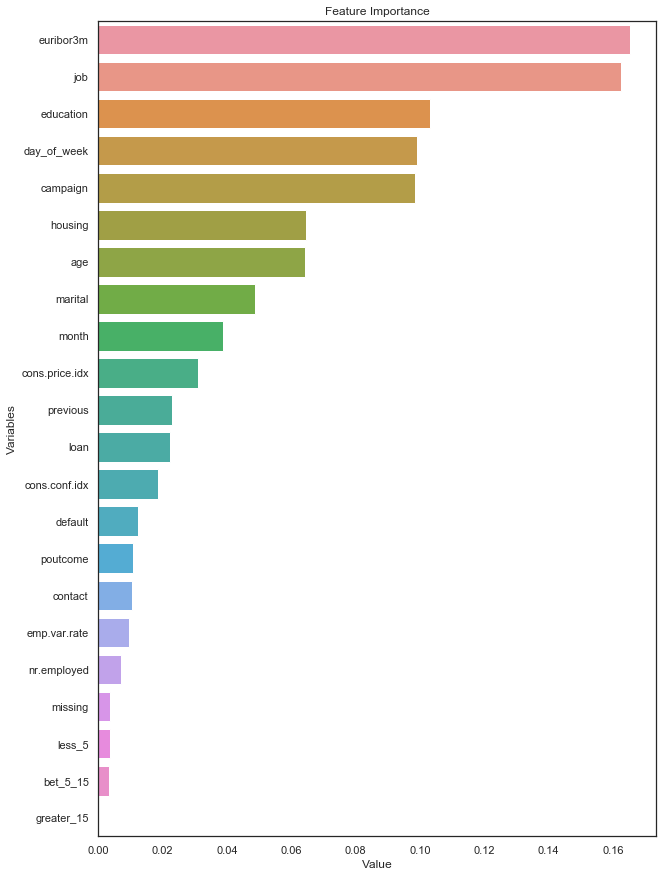

In [74]:
xgbf = xgb.feature_importances_
plotfeatures(df, xgbf)

We compare the feature importance from 3 models (Random Forest, LightGBM and XGBoost). We find two of these models predict similar feature importances and rank, 'euribor3m', 'job', 'campaign' and 'education'.

**Conclusion:**

1. Conducted Exploratory Data Analysis to check for statistical properties, distributions, trends and relations 
2. Modeled the data with hyperparameter optimization using kNN, XGBoost, LightGBM, Logistic Regression, Random Forest and got the best AUC value of 0.79 with Light GBM.
3. Conducted Feature importance to find the variables which are most strongly related to purchase decision

1. S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

2. S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]